In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def bias2(lambd, X, beta_star, x_test):
    A = np.linalg.inv(X.T @ X + lambd*np.eye(p)) @ X.T
    b1 = beta_star.T @ X.T @ A.T @ x_test
    b2 = beta_star.T @ x_test
    return (b1 - b2)[0][0]**2

def variance(lambd, X, beta_star, x_test):
    A = np.linalg.inv(X.T @ X + lambd*np.eye(p)) @ X.T
    v1 = x_test.T @ (sigma2 * A @ A.T + (A @ X @ beta_star) @ (A @ X @ beta_star).T) @ x_test
    v2 = (beta_star.T @ X.T @ A.T @ x_test)**2
    return (v1 - v2)[0][0]

def MSE(b2,v):
    return b2 + v

In [131]:
x1 = np.array([[1],[0.6]])
x2 = np.array([[1],[1]])
X = np.concatenate((x1.T,x2.T), axis=0)
beta_star = np.array([[0],[1]])
sigma2 = 1
p = beta_star.shape[0]

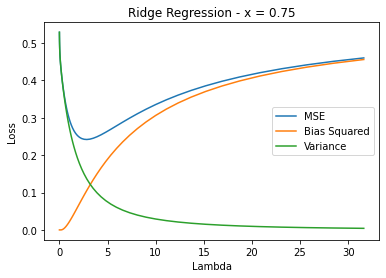

In [145]:
# Range of lambdas to test
lambd = np.logspace(-3,1.5,100)
x_test = np.array([[1],[0.75]])

b_vals = []
v_vals = []
mse_vals = []

for l in lambd:
    b_temp = bias2(l, X, beta_star, x_test)
    v_temp = variance(l, X, beta_star, x_test)
    mse_temp = MSE(b_temp,v_temp)
    
    b_vals.append(b_temp)
    v_vals.append(v_temp)
    mse_vals.append(mse_temp)

plt.plot(lambd,mse_vals,label='MSE')
plt.plot(lambd,b_vals,label='Bias Squared')
plt.plot(lambd,v_vals,label='Variance')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.title('Ridge Regression - x = 0.75')
plt.show()

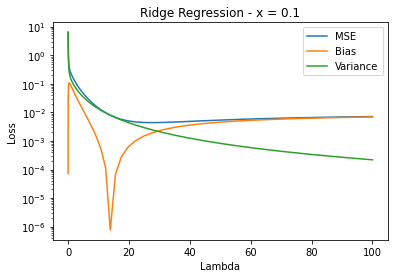

In [143]:
# Range of lambdas to test
lambd = np.logspace(-3,2,100)
x_test = np.array([[1],[0.1]])

b_vals = []
v_vals = []
mse_vals = []

for l in lambd:
    b_temp = bias2(l, X, beta_star, x_test)
    v_temp = variance(l, X, beta_star, x_test)
    mse_temp = MSE(b_temp,v_temp)
    
    b_vals.append(b_temp)
    v_vals.append(v_temp)
    mse_vals.append(mse_temp)

plt.plot(lambd,mse_vals,label='MSE')
plt.plot(lambd,b_vals,label='Bias')
plt.plot(lambd,v_vals,label='Variance')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.title('Ridge Regression - x = 0.1')
plt.yscale('log')
plt.show()